# IPASS
© Thijs van den Berg - 1740697

Het doel van deze applicatie is om de verschillende functies van het programma te tonen. Dit wordt aan de hand van verschillende casussen gedaan. Mede hierdoor wil ik de herbruikbaarheid van de libary laten zien.

In dit bestand zal regelmatig het begrip _punten_ worden genoemd. Dit staat voor een array van $[x, y]$-coördinaten in een (soms theoretische) tweedimentionale ruimte.

NB. Bronvermelding is te vinden in de `README.md` en in de documentatie.

In [1]:
import numpy as np
import pandas as pd

import ipass.plot.plot as plot
import ipass.plot.norm_verd as normPlot
import ipass.convertCSV as convert

## Casus: Percentage overlap van twee normale verdelingen berekenen
Twee normale verdelingen worden in een grafiek geplot. De normale verdelingen laten de geleidelijke, continue spreiding rond de gemiddeldes zien.  

De afstand van de gemiddeldes van de verdelingen tot het middelpunt dienen te worden meegegeven. In de titel is het percentage overlap van de twee verdelingen te zien. Verder dient er een lijst/tuple met twee labels te worden meegegeven. Dit zal straks van pas komen om de coördinaten van de geplotte punten te zien.

Mee te geven argumenten: `plotNormaleVerdeling(mu, sigma, middelpuntAfstand, labels)`

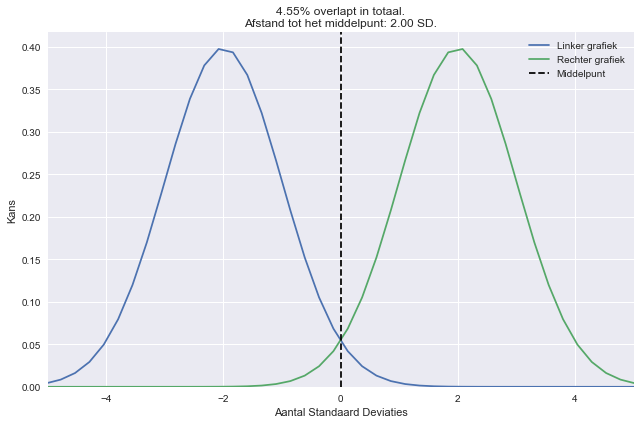

In [2]:
normPlot.normale_verdeling(0, 1, 2, ("Linker grafiek", "Rechter grafiek"))

## Casus: Percentage overlap van alle combinaties van punten berekenen
Stel we hebben een Numpy array met een $n$-aantal coödinaten/punten en we willen voor iedere combinatie van twee punten de overlap berekenen. Dan kan met de functie `plotAlleNormaleVerdlingen(punten)`.  

Door middel van $\sqrt{{\Delta x^2}+{\Delta y^2}} = \sqrt{c^2} = c$ kan de afstand tussen twee punten worden gevonden. Zodra de afstand tot het middelpunt is berekend kan ook het percentage overlap worden berekend.

Normale verdelingen zijn continue verdelingen die eeuwig door kunnen gaan. Daarom zijn onderstane plots van combinaties van punten die meer dan 0.00% (afgerond) overlappen. 

Stel we willen hebben een middelpunt $[4, 6]$ en een punt $[2, 5]$:  
$\Delta x = 4-2 = 2$  
$\Delta y = 6-5 = 1$  
${2^2+1^2} = {c^2}$  
${5} = {c^2}$  
$\sqrt{5} = {c} \approx 2.24$  

Concluderend, de hemelsbrede afstand van punt $[2, 5]$ naar het middelpunt $[4, 6]$ is $\approx 2.24$.  
Het tweede van twee punten is dus niet nodig om de afstand tot het middelpunt van twee punten te berekenen.

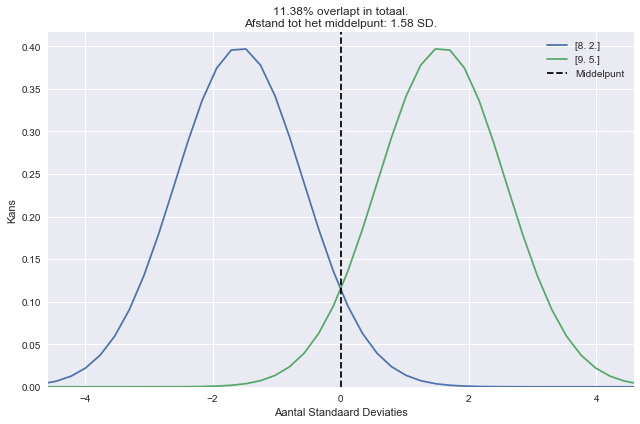

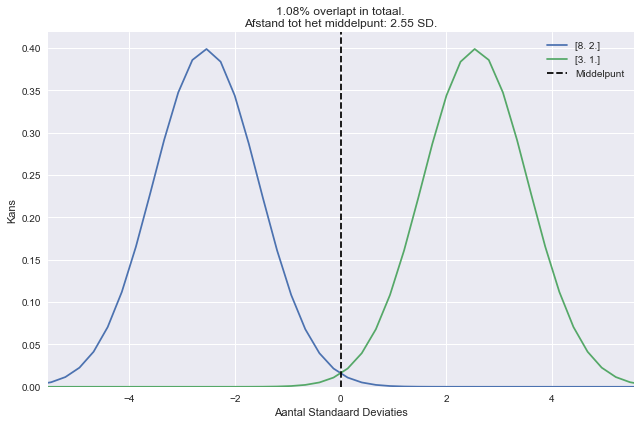

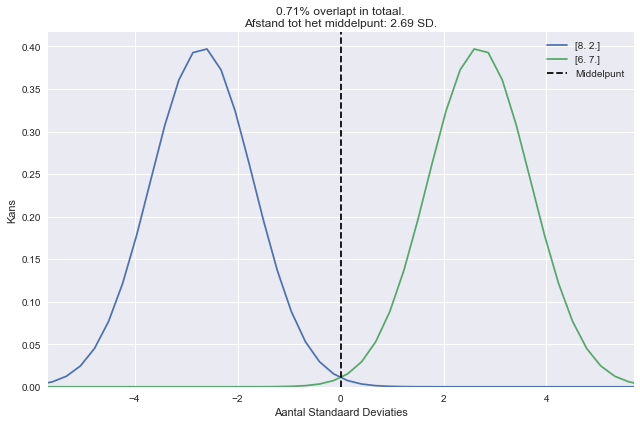

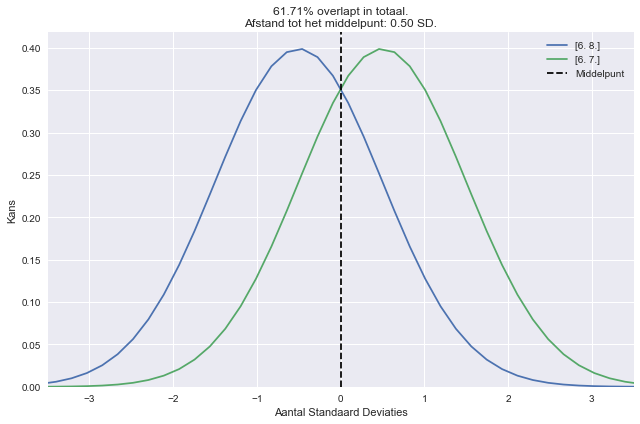

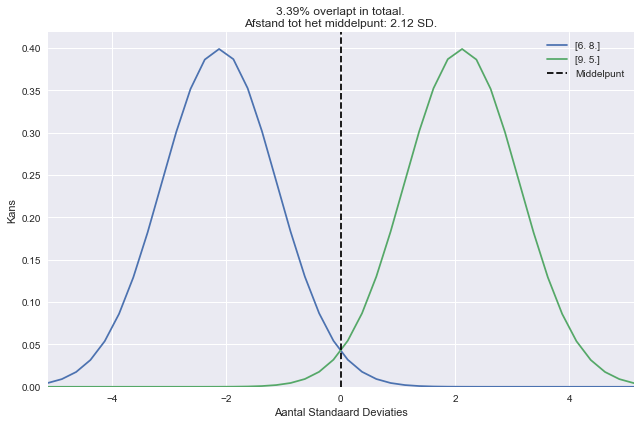

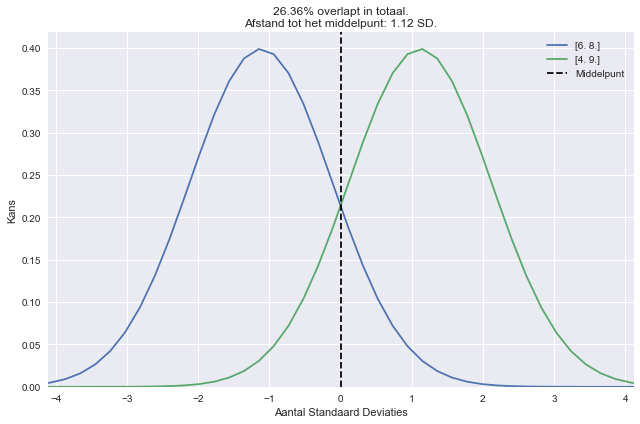

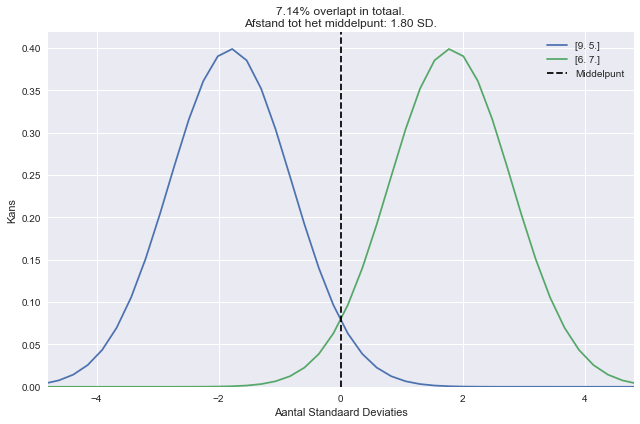

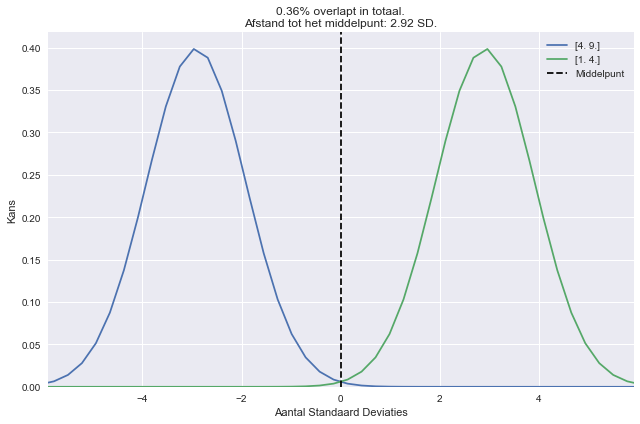

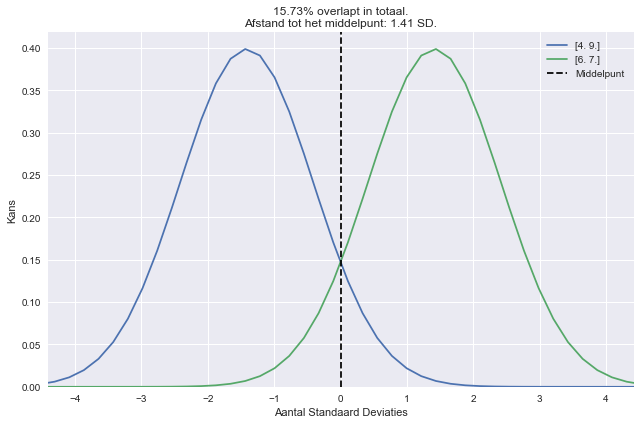

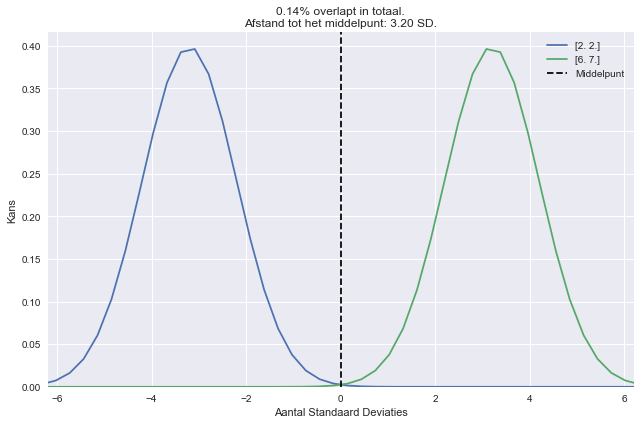

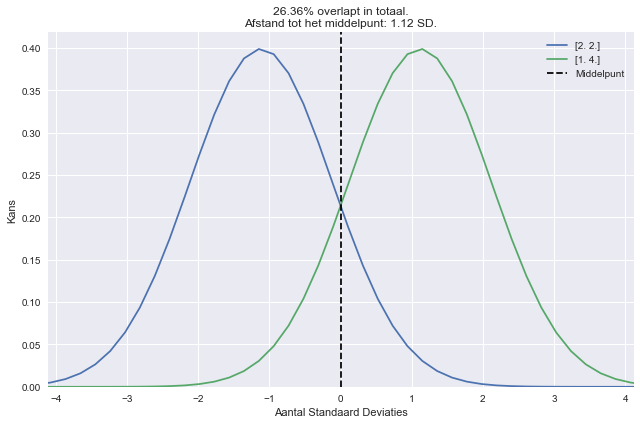

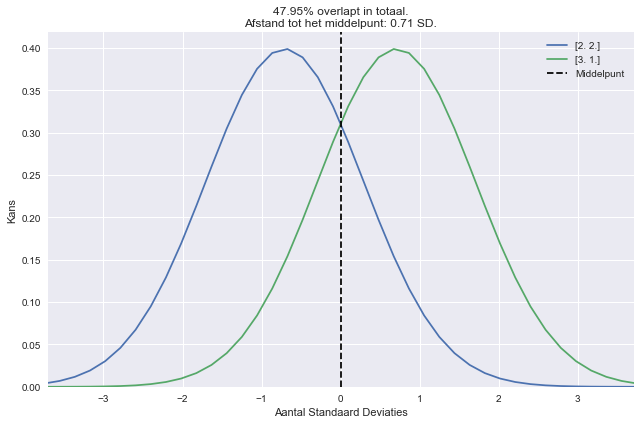

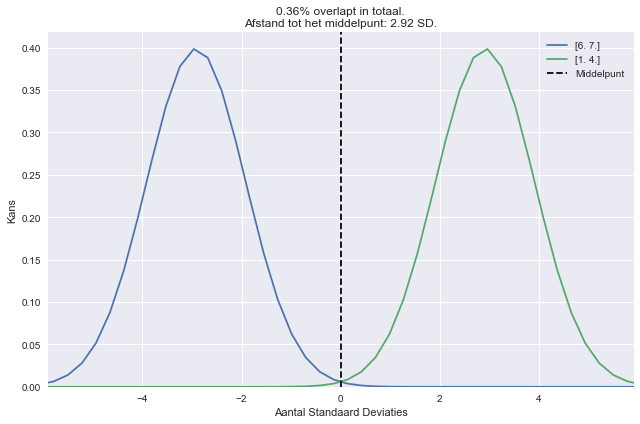

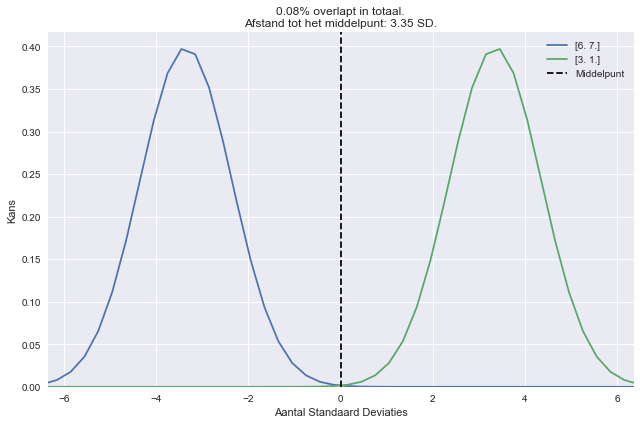

In [3]:
punten = np.array([[8, 2], [1, 4], [2, 2], [4, 9], [6, 7], [6, 8], [3, 1], [9, 5]])
# punten = np.random.randint(10, size=(8, 2))

normPlot.normale_verdeling_compleet(punten)

## Casus: Verzorgingsgebied visualiseren
Soms kan het handig zijn om de data waarmee we bezig zijn, te visualiseren. De vlakken in onderstaande Voronoi-diagram kunnen grofweg worden gezien als het 'verzorgingsgebied' van de punten. De blauwe punten zijn de meegegeven punten van de ($n$, 2)-array.

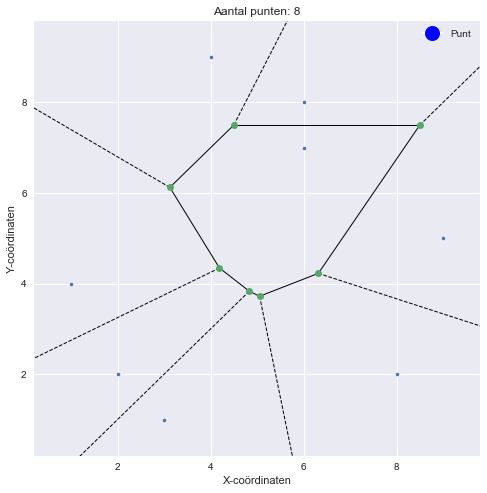

In [4]:
punten = np.array([[8, 2], [1, 4], [2, 2], [4, 9], [6, 7], [6, 8], [3, 1], [9, 5]])
# punten = np.random.randint(40, size=(32, 2))

plot.voronoi(punten, 0, 1, tekst=False, ellipse=False)

## Casus: Verzorgingsgebied visualiseren met overlappings-percentages
Aangezien het verzorgingsgebied uiteraard niet precies stopt bij de grens, geef onderstaande plot de overlappings-percentages van iedere combinatie van punten weer. Het overlappings-percentage en de bijbehordende ellipse zijn alleen zichtbaar wanneer er meer dan 0.00% overlapping is.  

Het overlappings-percentage kan op verschillende manieren worden geïnterpreteerd. In het geval van ziekteverspreiding kan een hoger percentage het risico en snelheid van besmetting vergroten.  

In het geval van bijvoorbeeld openbare WC's of cellulaire antennes kan het de efficiëntie aantonen. Wanneer gebieden sterk worden overlapt kan het blijken dat antennes voor niks of op inefficiënt plekken zijn geplaatst. Onderstaande plot zou kunnen worden gebruikt om betere plaatsingslocaties vast te stellen.

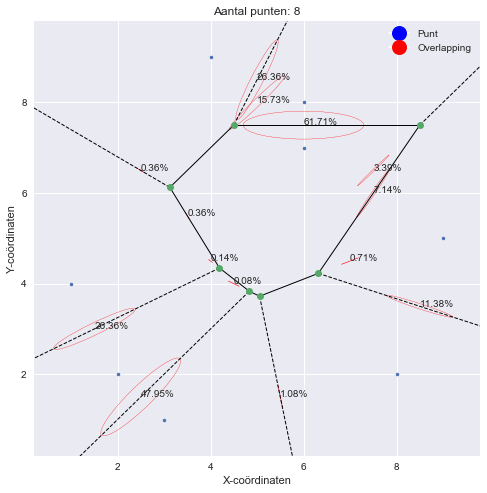

In [5]:
punten = np.array([[8, 2], [1, 4], [2, 2], [4, 9], [6, 7], [6, 8], [3, 1], [9, 5]])
# punten = np.random.randint(20, size=(16, 2))

plot.voronoi(punten, 0, 1)

## Casus: Verloop van ziekteverspreiding simuleren
In onderstaande grafiek wordt de verspreiding van bijvoorbeeld een ziekte gesimuleerd. Als eerste wordt er een matrix opgesteld van $n \times n$ waarbij $n$ het aantal punten in de variabele `punten` is. Voor iedere combinatie van punten wordt in de array het overlappings-percentage berekend en ingevoerd in de bijbehorende plekken in de matrix.  

Om het verloop op tijdstip $t$ te berekenen wordt de formule $\vec v \cdot M^t$ gebruikt. Vector $\vec v$ heeft lengte $n$. In vector $\vec v$ wordt aangegeven waar de 'infectie' begint. In onderstaande code-voorbeeld ziet vector $\vec v$ er als volgt uit:

$$ 
\vec v = \begin{bmatrix}
0 \\
0 \\
0 \\
0 \\
1 \\
0 \\
0 \\
0 \\
\end{bmatrix} $$

Dit wilt zeggen dat de 'infectie' begint op punt $[6, 7]$ aangezien dit het 5e punt in de array `punten` is. In onderstaande grafiek is dan ook te zien dat punt $[6, 7]$ al vanaf tijdstip 0 op waarde 1 staat. De overlappingsmatrix $M$ ziet er in onderstaande voorbeeld als volgt (afgerond op drie decimalen) uit:

$$\begin{array}{r|rrrrrrrr}
                   & [8, 2] & [1, 4] & [2, 2] & [4, 9] & [6, 7] & [6, 8] & [3, 1] & [9, 5]\\ \hline          
            [8, 2] & 1      &  0     &  0.003 &  0     &  0.007 &  0.002 &  0.011 & 0.114 \\
            [1, 4] & 0.003  &  1     &  0.264 &  0.004 &  0.004 &  0.001 &  0.071 & 0     \\
            [2, 2] & 0      &  0.264 &  1     &  0     &  0.001 &  0     &  0.48  & 0     \\
            [4, 9] & 0      &  0.004 &  0     &  1     &  0.57  &  0.264 &  0     & 0     \\
            [6, 7] & 0.007  &  0.004 &  0.001 &  0.157 &  1     &  0.617 &  0.001 & 0.071 \\
            [6, 8] & 0.002  &  0.001 &  0     &  0.264 &  0.617 &  1     &  0     & 0.034 \\
            [3, 1] & 0.011  &  0.071 &  0.48  &  0     &  0.001 &  0     &  1     & 0     \\
            [9, 5] & 0.114  &  0     &  0     &  0.001 &  0.071 &  0.034 &  0     & 1    
\end{array}$$

Het volgende punt wordt geinfecteerd: [6 7]

Even geduld a.u.b, dit kan even duren...


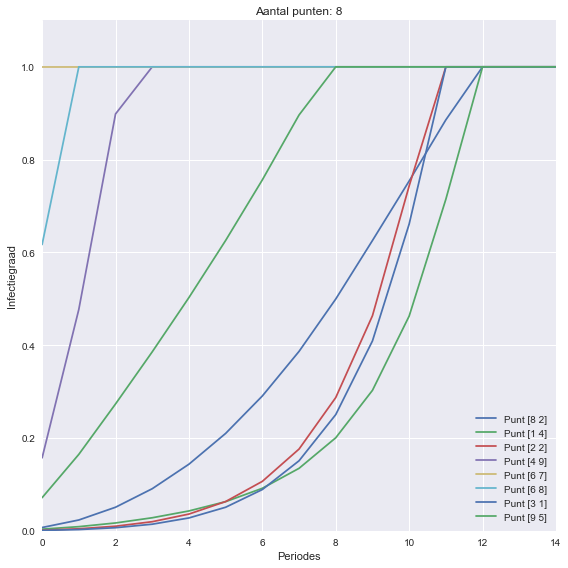

In [6]:
punten = np.array([[8, 2], [1, 4], [2, 2], [4, 9], [6, 7], [6, 8], [3, 1], [9, 5]])
infectie = 4

inputVector = np.zeros(punten.shape[0])  # Array met 0-en even lang als het aantal punten
inputVector[infectie] = 1
print(f"Het volgende punt wordt geinfecteerd: {punten[infectie]}\n")

plot.verloop(punten, inputVector.T, 14)

Te zien is als de infectie begint op punt $[6, 7]$, na twaalf iteraties alle punten zijn geinfecteerd. Stel, de infectie begint op het punt $[9, 5]$, een relatief afgelegen punt. Hierdoor duurt het blijkens onderstaande grafiek een periode langer voordat alle punten volledig zijn geinfecteerd. Als laatst is het punt $[1, 4]$ aan de beurt. Ook is te zien dat de verspreiding veel minder snel op gang komt. De eerste punten punten zijn pas na 5 iteraties volledig geinfecteerd.

Het volgende punt wordt geinfecteerd: [9 5]

Even geduld a.u.b, dit kan even duren...


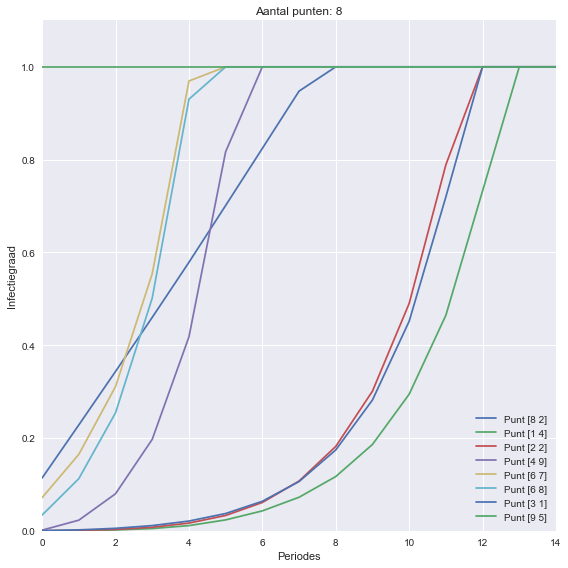

In [7]:
punten = np.array([[8, 2], [1, 4], [2, 2], [4, 9], [6, 7], [6, 8], [3, 1], [9, 5]])
infectie = 7

inputVector = np.zeros(punten.shape[0])  # Array met 0-en even lang als het aantal punten
inputVector[infectie] = 1
print(f"Het volgende punt wordt geinfecteerd: {punten[infectie]}\n")

plot.verloop(punten, inputVector.T, 14)

# Echte data gebruiken
-----------------
## Casus: Verspreiding van ziektes d.m.v. kinderdagverblijven in Wageningen
Het CSV-bestand `dataKDV.csv` bevat informatie van alle 45.000+ kinderdagverblijven en BSO's van Nederland. Om bruikbare data van dit CSV-bestand te krijgen, dienen de adressen omgezet te worden in coördinaten. Verder wordt uit alle data een selectie van Wageningen gemaakt ter illustratie.  

Kinderdagverblijven zijn een hotspot voor ziektes zoals de mazelen. Een deel van de kinderen is nog te jong om ingeënt te worden en een steeds groter wordend deel wordt bewust door de ouders niet gevaccineerd. In de volgende grafieken zal de spreiding van KDV's in Wageningen zichtbaar zijn en het mogelijke verloop van een ziekte-uitbraak.

In [8]:
# convert.straat2coord('data/input/dataKDV.csv', 'Wageningen', 'opvanglocatie_woonplaats', 'opvanglocatie_adres')  # CSV-bestand maken
coordinaten = pd.read_csv("data/output/geo_dataKDV.csv", sep=",", dtype=np.float64)  # CSV-bestand uitlezen
coordinaten.head()

,latitude,longitude
0,51.963189,5.652897
1,51.977455,5.669383
2,51.970015,5.672010
3,51.970864,5.659421
4,51.983897,5.642122


Om een beeld van de data te krijgen worden er twee Voronoi-diagrammen geplot. De meegegeven standaarddeviatie $0.0015$ is een arbitrair getal en dient per type en spreiding van de data te worden vastgesteld. Het verzorgingsgebied van een kinderdagverblijf is relatief klein waardoor een groot deel van de 'klanten' zich in de nabije omgeving zal bevinden.

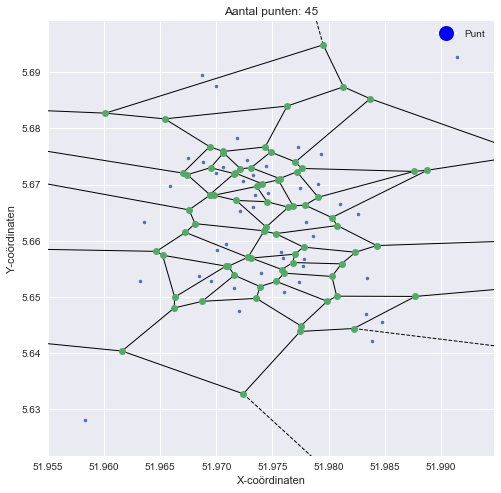

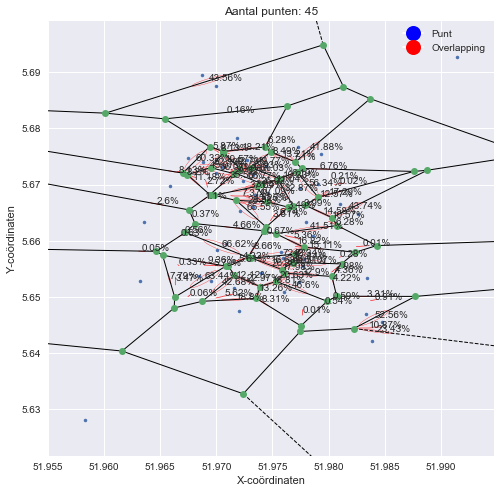

In [9]:
punten = coordinaten.values[:, :]  # DataFrame omzetten naar NP-array
plot.voronoi(punten, 0, 0.0015, tekst=False, ellipse=False)
plot.voronoi(punten, 0, 0.0015, tekst=True, ellipse=True)

In bovenstaande Voronoi-diagram is te zien dat de twee KDV's linksonder en rechtsboven ver van de overige afstaan. Dit is ook te zien in onderstaande grafiek. Sommige KDV's zijn al na drie periodes volledig besmet terwijl deze twee punten pas na mere dan 20 periodes volledig besmet zijn.

In onderstaande grafiek is gekozen om het tiende punt te besmetten. Dit is willekeurig gekozen en had ieder van de $\approx$ 45 punten kunnen zijn. Een punt dicht in de buurt van andere KDV's zal een heel ander resultaat geven dan relatief afgelegen punt.

Het volgende punt wordt geinfecteerd: 
[51.9809937  5.6664542]

Even geduld a.u.b, dit kan even duren...


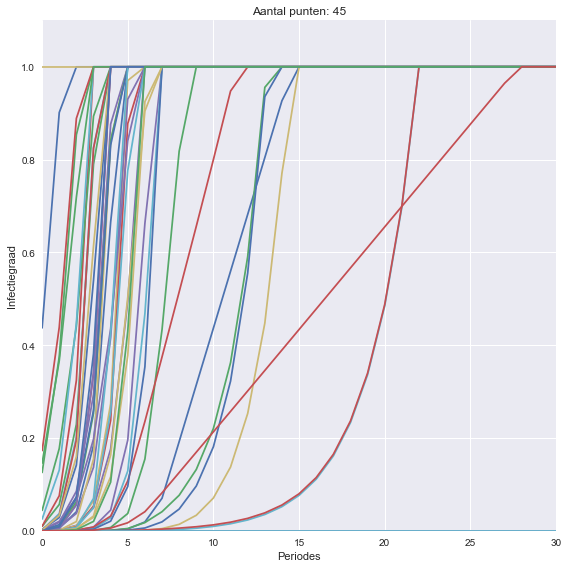

In [10]:
punten = coordinaten.values[:, :]  # DataFrame omzetten naar NP-array
infectie = 10

inputVector = np.zeros(punten.shape[0])  # Array met 0-en even lang als het aantal punten
inputVector[infectie]  = 1
print(f"Het volgende punt wordt geinfecteerd: \n{punten[infectie]}\n")

plot.verloop(punten, inputVector.T, 30, sigma=0.0015, legenda=False)

## Casus: Verzorgingsgebied van hondenpoepbakken in Tilburg
Om de effectiviteit van de locatie van hondenpoepbakken in Tilburg te testen kan worden gekeken naar het percentage dat de bakken met elkaar overlappen. Staan bakken dicht bij elkaar omdat er een groot uitlaatveld is of zijn er plekken in de stad waar er een ernstig tekort aan bakken dreigt? Dit kan allemaal inzichtelijk worden met Voronoi-diagrammen en overlappings-percentages.

Dit bestand bevat origineel alleen maar gegevens van de latitude en longitude dus hoeft niet te worden geconverteerd.

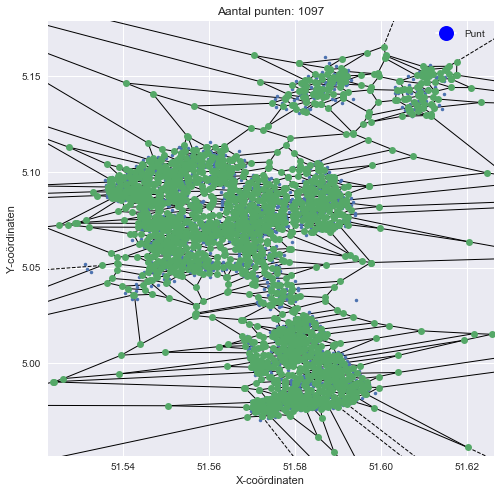

In [31]:
coordinaten = pd.read_csv("data/input/hondenpoepbakkenTilburg.csv", sep=",", dtype=np.float64)
punten = coordinaten.values[:, :]  # DataFrame omzetten naar NP-array
plot.voronoi(punten, 0, 1, tekst=False, ellipse=False)

In bovenstaande Voronoi is al vrij duidelijk te zien dat er enkele clusters ontstaan. Hiervan bevinden de grootste twee zich in het midden en onderaan de plot. De punten zitten erg dicht op elkaar waardoor individuele ellipsen met overlappings-percentages niet meer zichtbaar zijn. Dit is de reden dat de tekst en de ellipsen uit zijn te schakelen in de Voronoi-diagrammen.

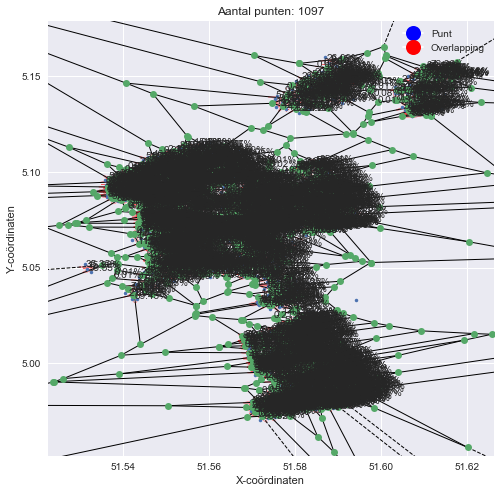

In [33]:
plot.voronoi(punten, 0, 0.0015, tekst=True, ellipse=True)

## Casus: Verspreiding van ziektes d.m.v. zorginstellingen in Utrecht
Naast KDV's zijn zorginstellingen ook plekken met een verhoogt risico op ziekte. Op veel zorginstellingen zijn mensen met een verminderde weerstand of zwakke gezondheid.

Om het verloop van de ziekteverspreiding te laten zien is er een Voronoi-diagram zichtbaar met de posities en verzorgingsgebieden van iedere zorginstelling in Utrecht.

Verder is er nog een grafiek te zien met het verloop van de verspreiding.

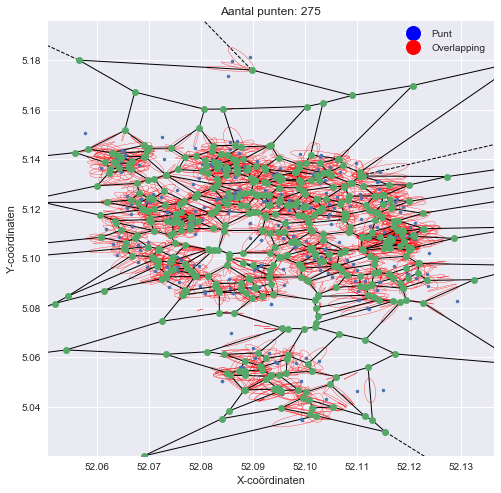

In [3]:
coordinaten = pd.read_csv("data/output/geo_zorg-opendata-juni2016csv.csv", sep=",", dtype=np.float64)
punten = coordinaten.values[:, :]  # DataFrame omzetten naar NP-array
plot.voronoi(punten, 0, 0.004, tekst=False, ellipse=True)

Te zien is dat het geinfecteerde punt $220$ redelijk buiten de stad ligt $[52.1099893,  5.0465184]$. Hierdoor worden de zorginstellingen in de directe omgeving snel geinfecteerd. Zodra de eerste punten die wat verder van punt $220$ liggen geinfecteerd raken, gaat het snel. Als een kettingreactie raken alle punten in de buurt geinfecteerd en binnen 30 periodes is bijna de gehele stad volledig besmet. Er blijven 3 zorginstellingen over die het nog enkele periodes volhouden. Zonder de coördinaten te geven is op onderstaande kaart al snel te raden welk cluster van drie punten dit moet zijn geweest. (Hint: aan de andere kant van Utrecht dan waar de infectie begon)

Het volgende punt wordt geinfecteerd: 
[52.1099893  5.0465184]

Even geduld a.u.b, dit kan even duren...


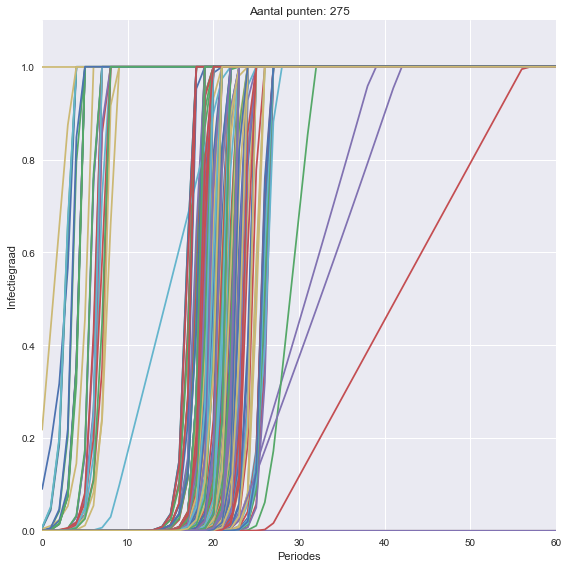

In [4]:
infectie = 220

inputVector = np.zeros(punten.shape[0])  # Array met 0-en even lang als het aantal punten
inputVector[infectie]  = 1
print(f"Het volgende punt wordt geinfecteerd: \n{punten[infectie]}\n")

plot.verloop(punten, inputVector.T, 60, sigma=0.002, legenda=False)

Het verloop van links naar rechts is duidelijk zichtbaar. De startpositie van een infectie is van groot belang op de snelheid van verspreiding.

Kaart aan het maken. 
Even geduld a.u.b, dit kan even duren...


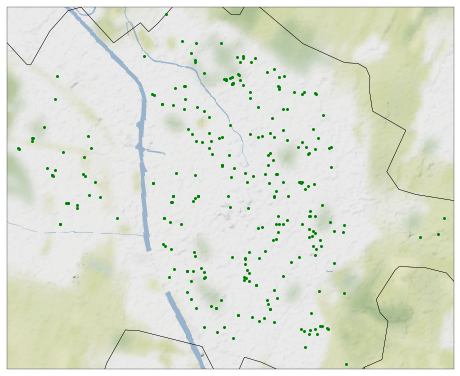

In [5]:
plot.kaart("data/output/geo_zorg-opendata-juni2016csv.csv", terrein=True)

# W.I.P: Voronoi visualiseren op kaart
Helaas is dit gedeelte niet binnen de tijd afgekomen. Het uiteindelijke doel was om de Voronoi-diagrammen een 'terrein'-achtergrond te geven. Zo kan men beter een idee krijgen van de werkelijke positie.

Kaart aan het maken. 
Even geduld a.u.b, dit kan even duren...


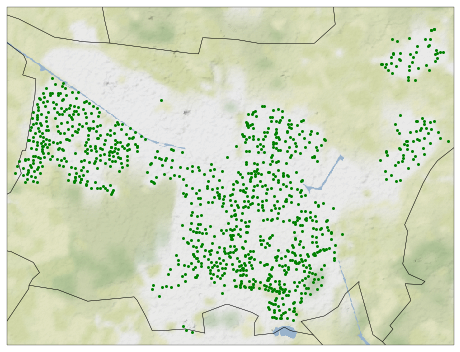

In [16]:
plot.kaart("data/input/hondenpoepbakkenTilburg.csv", terrein=True)

Kaart aan het maken. 
Even geduld a.u.b, dit kan even duren...


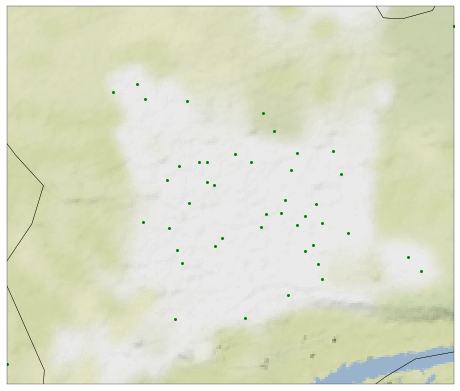

In [17]:
# convert.straat2coord('data/input/dataKDV.csv', 'Wageningen', 'opvanglocatie_woonplaats', 'opvanglocatie_adres')  # CSV-bestand maken
plot.kaart("data/output/geo_dataKDV.csv", terrein=True)

Kaart aan het maken. 
Even geduld a.u.b, dit kan even duren...


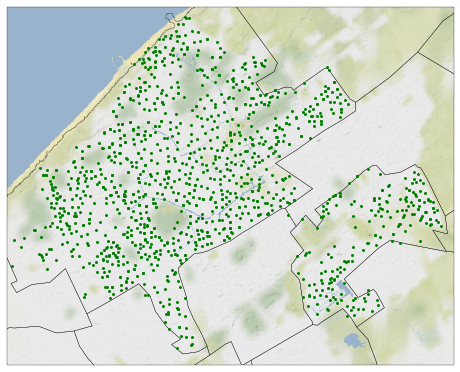

In [18]:
# convert.coord2coord("data/input/distributiekastenDenHaag.csv", "LAT", "LONG")
plot.kaart("data/output/geo_distributiekastenDenHaag.csv", terrein=True)